<a href="https://colab.research.google.com/github/JARACH-209/AI-ML_Lab/blob/master/Final_HF_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.style.use("ggplot")
plt.style.use("seaborn")

     |████████████████████████████████| 65.8MB 42kB/s 


In [58]:
# Function to run 10 fold cross validation
def cross_validation(clf,X,Y):
    cv_rf = cross_validate(clf,X,Y,scoring=('accuracy','roc_auc','recall','precision'),cv = 10,n_jobs=-1)
    print("Average CV Accuracy Test \t%0.2f"%(cv_rf['test_accuracy'].mean()*100))
    print("Average CV ROC-AUC Score \t%0.2f"%(cv_rf['test_roc_auc'].mean()*100))
    print("Average CV Recall Score \t%0.2f"%(cv_rf['test_recall'].mean()*100))
    print("Average CV Precision Score \t%0.2f"%(cv_rf['test_precision'].mean()*100))
    print("-----------------------------")
    print("Best Accuracy CV : \t\t%0.2f"%max(cv_rf['test_accuracy']*100))
    print("Best ROC CV : \t\t\t%0.2f"%max(cv_rf['test_roc_auc']*100))
    print("Best Recall CV : \t\t%0.2f"%max(cv_rf['test_recall']*100))
    print("Best Precision CV : \t\t%0.2f"%max(cv_rf['test_precision']*100))

def scaling_X(X_fit,X_transform):
    sscaler = preprocessing.StandardScaler().fit(X_fit)
    X = sscaler.transform(X_transform)
    return X

In [ ]:
df = pd.read_csv("/content/lvef_classification_DataFrame.csv")
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
features = {}
columns = df.columns
for i in range(len(columns)):
    features[i] = columns[i]

In [ ]:
X = df.iloc[:,:25].to_numpy()
Y = df['lvef_classification'].to_numpy()

In [ ]:
Y = Y.astype(int)
Y = Y.reshape(-1)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.148)
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
scaler = preprocessing.StandardScaler().fit(x_test)
x_test = scaler.transform(x_test)

In [ ]:
clf = RandomForestClassifier(n_estimators=1333,bootstrap=True,max_depth=80, max_features='sqrt', min_samples_split= 4, min_samples_leaf=3).fit(x_train,y_train)
clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

pred_prob = clf.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 81.61
Accuracy Train 93.20
ROC-AUC Score 89.81
Recall Score 76.47


<BarContainer object of 25 artists>

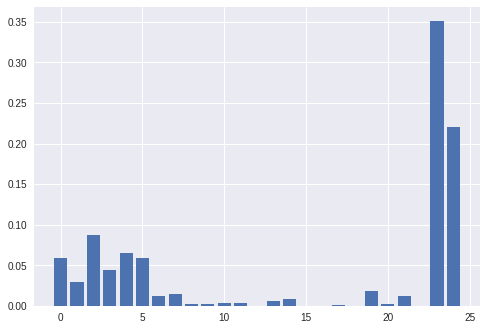

In [ ]:
plt.bar(range(len(clf.feature_importances_)),clf.feature_importances_)

In [ ]:
from xgboost import XGBRFClassifier
xgb = XGBRFClassifier()
xgb.fit(x_train,y_train)
y_predicted = xgb.predict(x_test)
y_train_pred = xgb.predict(x_train)

pred_prob = xgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 77.01
Accuracy Train 82.60
ROC-AUC Score 86.98
Recall Score 76.47


Text(0.5, 1.0, 'Feature Importance for XGBoost')

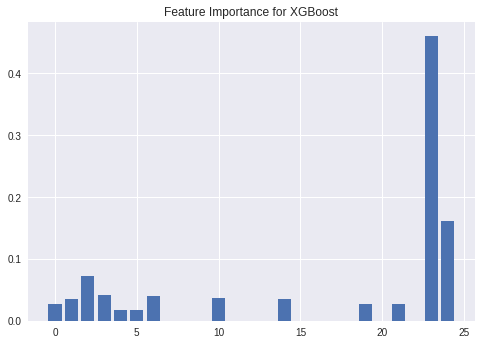

In [ ]:
plt.bar(range(len(xgb.feature_importances_)),xgb.feature_importances_)
plt.title("Feature Importance for XGBoost")

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(x_train,y_train)
y_predicted = lgb.predict(x_test)
y_train_pred = lgb.predict(x_train)

pred_prob = lgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 77.01
Accuracy Train 100.00
ROC-AUC Score 85.51
Recall Score 74.51


Text(0.5, 1.0, 'Feature Importance for LightGBM')

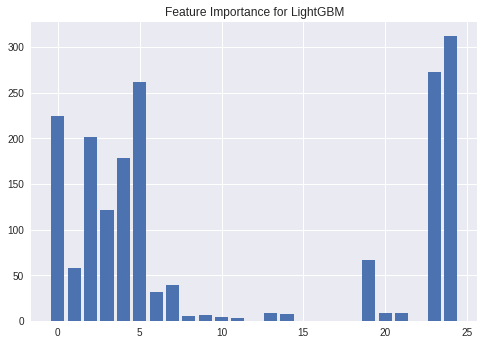

In [ ]:
plt.bar(range(len(lgb.feature_importances_)),lgb.feature_importances_)
plt.title("Feature Importance for LightGBM")

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
cgb = CatBoostClassifier(iterations=1000)
cgb.fit(x_train,y_train)
y_predicted = cgb.predict(x_test)
y_train_pred = cgb.predict(x_train)
pred_prob = cgb.predict_proba(x_test)

In [ ]:
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 80.46
Accuracy Train 95.60
ROC-AUC Score 89.76
Recall Score 76.47


Text(0.5, 1.0, 'Feature Importance for CatBoost')

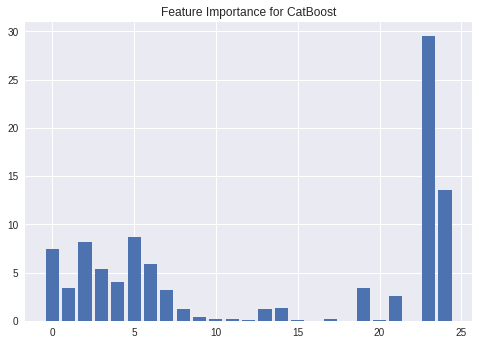

In [ ]:
plt.bar(range(len(cgb.feature_importances_)),cgb.feature_importances_)
plt.title("Feature Importance for CatBoost")

Least Important Features : 9,10,12,13,15,16,17,18,20,22,25

Modeling by removal of these features.

In [ ]:
df = pd.DataFrame(df.to_numpy())

In [ ]:
df.drop(columns=[9,10,12,13,15,16,17,18,20,22,25],inplace=True)

In [ ]:
X = df.to_numpy()

In [ ]:
X.shape

(587, 15)

In [ ]:
Y = Y.astype(int)
Y = Y.reshape(-1)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.148)
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
scaler = preprocessing.StandardScaler().fit(x_test)
x_test = scaler.transform(x_test)

In [ ]:
least_imp = [9,10,12,13,15,16,17,18,20,22]
x_train = np.delete(x_train,least_imp,axis=1)
x_test = np.delete(x_test,least_imp,axis=1)
clf = RandomForestClassifier(n_estimators=1333,bootstrap=True,max_depth=80, max_features='sqrt', min_samples_split= 4, min_samples_leaf=3).fit(x_train,y_train)
clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

pred_prob = clf.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

<BarContainer object of 9 artists>

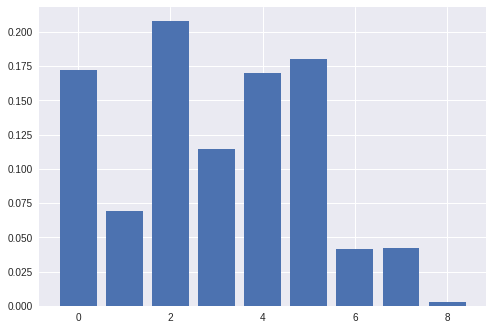

In [ ]:
plt.bar(range(len(clf.feature_importances_)),clf.feature_importances_)

In [ ]:
from xgboost import XGBRFClassifier
xgb = XGBRFClassifier()
xgb.fit(x_train,y_train)
y_predicted = xgb.predict(x_test)
y_train_pred = xgb.predict(x_train)

pred_prob = xgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 85.06
Accuracy Train 83.60
ROC-AUC Score 88.57
Recall Score 95.65


Text(0.5, 1.0, 'Feature Importance for XGBoost')

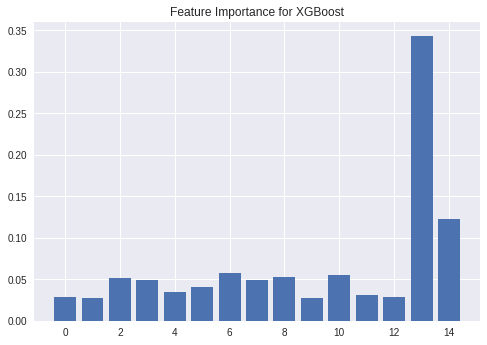

In [ ]:
plt.bar(range(len(xgb.feature_importances_)),xgb.feature_importances_)
plt.title("Feature Importance for XGBoost")

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(x_train,y_train)
y_predicted = lgb.predict(x_test)
y_train_pred = lgb.predict(x_train)

pred_prob = lgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 82.76
Accuracy Train 100.00
ROC-AUC Score 88.49
Recall Score 89.86


Text(0.5, 1.0, 'Feature Importance for LightGBM')

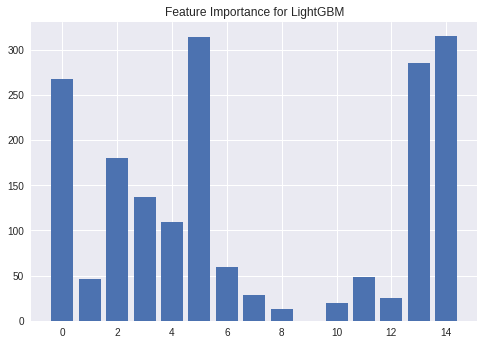

In [ ]:
plt.bar(range(len(df.columns)),lgb.feature_importances_)
plt.title("Feature Importance for LightGBM")

In [ ]:
# Removing all the least important features.
least_imp = [9,10,12,13,15,16,17,18,20,22]
for each in least_imp:
    del features[each]
features

{0: 'pulse',
 1: 'respiration',
 2: 'systolic.blood.pressure',
 3: 'diastolic.blood.pressure',
 4: 'map',
 5: 'BMI',
 6: 'NYHA.cardiac.function.classification',
 7: 'Killip.grade',
 8: 'myocardial.infarction',
 11: 'Chronic.obstructive.pulmonary.disease',
 14: 'moderate.to.severe.chronic.kidney.disease',
 19: 'CCI.score',
 21: 'fio2',
 23: 'left.ventricular.end.diastolic.diameter.LV',
 24: 'brain.natriuretic.peptide'}

Successful Selection of important features
```
With 25 Features on RFClassifier
Accuracy Test  87.36
Accuracy Train 94.20
ROC-AUC Score  88.81
Recall Score   92.75

With 15 Features (Most imp) on RFClassifier
Accuracy Test 87.36
Accuracy Train 95.00
ROC-AUC Score 88.81
Recall Score 92.75
```
Validated by training on 25 features and then removing the leat_imp features from the same set and training again.

In [ ]:
frame = pd.DataFrame(X)
#frame.drop(columns=[9,10,12,13,15,16,17,18,20,22])
frame['lvef_class'] = Y
frame.to_csv("Reduced_Features_set.csv")

In [ ]:
frame.shape

(587, 16)

Most Important Features :
1. Brain Natriuretic Peptide
2. LV end diastolic diameter

----

Testing the Stacking classifier over reduced featues

In [ ]:
x_train.shape

(500, 15)

In [ ]:
from sklearn.ensemble import StackingClassifier
clf = RandomForestClassifier(n_estimators=1333,bootstrap=True,max_depth=80, max_features='sqrt', min_samples_split= 4, min_samples_leaf=3)
estimators = [('rfc',clf),('lgb',LGBMClassifier()),('cat',CatBoostClassifier(iterations=5000),('xgb',XGBRFClassifier()))]
final_estimator = RandomForestClassifier()

clf_stack = StackingClassifier(estimators, final_estimator)
clf_stack.fit(x_train,y_train)

In [ ]:
y_predicted = clf_stack.predict(x_test)
y_train_pred = clf_stack.predict(x_train)
pred_prob = clf_stack.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 83.91
Accuracy Train 91.80
ROC-AUC Score 87.72
Recall Score 94.20


In [ ]:
len(np.where(Y==0)[0])


140

SOLVE THIS ISSUE OF IMBALANCE

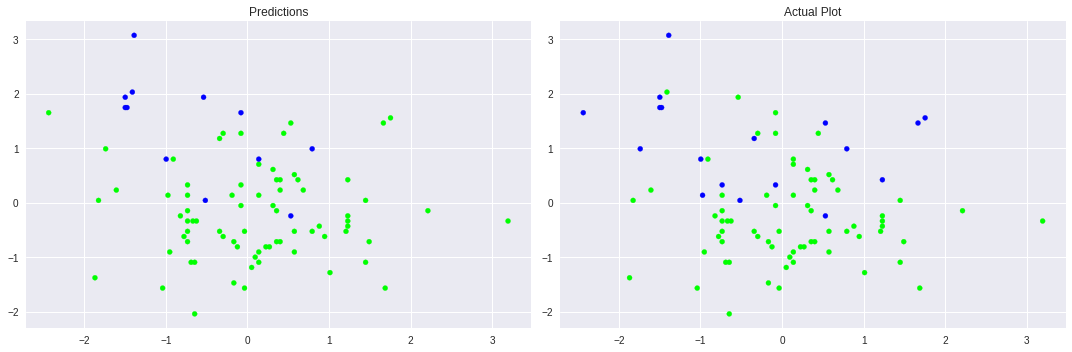

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(x_test[:,4],x_test[:,13],c=y_predicted,cmap='brg',s=25)
axes[1].scatter(x_test[:,4],x_test[:,13],c=y_test,cmap='brg',s=25)
axes[0].title.set_text("Predictions")
axes[1].title.set_text("Actual Plot")
fig.tight_layout()

Included new Features for explorations :
* High Senstiivity Troponin
* Cholestrol
* Creatine
* Cystanin

In [ ]:
df = pd.read_csv("/content/07_with_LVEF_sodium_HST_BNP.csv")
df.drop(columns=['Unnamed: 0','map','diabetes','type.of.heart.failure','liver.disease','congestive.heart.failure','acute.renal.failure','moderate.to.severe.chronic.kidney.disease','dementia','peptic.ulcer.disease','hemiplegia','connective.tissue.disease','leukemia','AIDS','weight','height'],inplace=True)

In [ ]:
df.columns

Index(['pulse', 'respiration', 'systolic.blood.pressure',
       'diastolic.blood.pressure', 'map', 'BMI',
       'NYHA.cardiac.function.classification', 'Killip.grade',
       'myocardial.infarction', 'peripheral.vascular.disease',
       'cerebrovascular.disease', 'Chronic.obstructive.pulmonary.disease',
       'diabetes', 'CCI.score', 'type.II.respiratory.failure', 'fio2', 'LVEF',
       'left.ventricular.end.diastolic.diameter.LV',
       'brain.natriuretic.peptide', 'cystatin', 'creatine.kinase',
       'cholesterol', 'creatinine.enzymatic.method', 'sodium', 'potassium',
       'calcium', 'high.sensitivity.troponin'],
      dtype='object')

In [ ]:
len(df.columns)

27

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


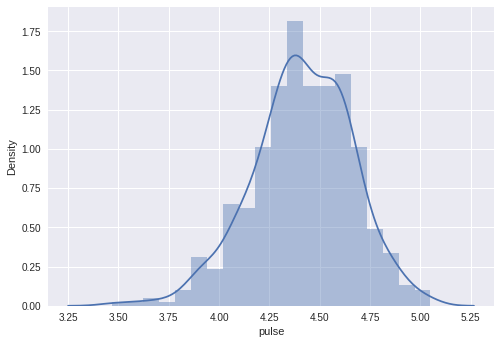

In [ ]:
sns.distplot(df['pulse'])

Capping Brain Natriuretic Peptide at 4000 because above it doesn't relate to heart conditions and are same. citation provided

In [ ]:
df['brain.natriuretic.peptide'].clip(upper=3000,inplace=True)
df['creatinine.enzymatic.method'].clip(upper=600,inplace=True)

Creatine Kinase above 1000: Refers to idiopathic inflammatory myopathy (IIM) hence we can cap the values to 1000.
Hence to avoid the ouliers capped to 1000.

In [ ]:
df['creatine.kinase'].clip(upper=1000,inplace=True)
df['high.sensitivity.troponin'].clip(lower = 0.1,inplace=True)
# To prevent the division by 0

Converting all the numarical distributions to log normals

In [ ]:
# centering the normal distributions by converting them to log
for each in df.columns:
    if max(df[each]) > 10 and each != 'LVEF':
        df[each] = np.log(df[each])

First setting cutoff of LVEF : 50 

In [ ]:
dfef1 = df.copy()
dfef2 = df.copy()
dfef1['LVEF'].clip(40,41,inplace = True)
dfef1['LVEF'].replace(to_replace=40,value=int(0),inplace=True)
dfef1['LVEF'].replace(to_replace=41,value=int(1),inplace=True)

In [ ]:
# Converting to a 3 class encoding
'''
dfef = df.copy()
ejection_fraction = dfef['LVEF'].to_numpy()
for i in range(len(ejection_fraction)):
    if ejection_fraction[i] < 41 :
        ejection_fraction[i] = -1
    elif ejection_fraction[i] > 40 and ejection_fraction[i] < 50:
        ejection_fraction[i] = 0
    else:
        ejection_fraction[i] = 1

dfef1['LVEF'] = ejection_fraction
'''
# 3 class case did not work !!!

In [ ]:
df = pd.read_csv("/content/07_with_LVEF_sodium_HST_BNP.csv")
df.drop(columns=['Unnamed: 0','map','diabetes','type.of.heart.failure','liver.disease','congestive.heart.failure','acute.renal.failure','moderate.to.severe.chronic.kidney.disease','dementia','peptic.ulcer.disease','hemiplegia','connective.tissue.disease','leukemia','AIDS','weight','height'],inplace=True)
df['brain.natriuretic.peptide'].clip(upper=3000,inplace=True)
df['creatinine.enzymatic.method'].clip(upper=600,inplace=True)

df['creatine.kinase'].clip(upper=1000,inplace=True)
df['high.sensitivity.troponin'].clip(lower = 0.1,inplace=True)
# To prevent the division by 0

df_og = df.copy()
# centering the normal distributions by converting them to log
for each in df.columns:
    if max(df[each]) > 10 and each != 'LVEF':
        df[each] = np.log(df[each])

dfef1 = df.copy()
dfef2 = df.copy()
dfef3 = df.copy()

dfef1['LVEF'].clip(40,41,inplace = True)
dfef1['LVEF'].replace(to_replace=40,value=int(0),inplace=True)
dfef1['LVEF'].replace(to_replace=41,value=int(1),inplace=True)

dfef3['LVEF'].clip(40,50,inplace = True)
dfef3['LVEF'].replace(to_replace=40,value=int(0),inplace=True)
dfef3['LVEF'].replace(to_replace=50,value=int(1),inplace=True)

Y = dfef1['LVEF'].to_numpy()
X = pd.DataFrame(dfef1.drop(columns = ['LVEF'])).to_numpy()
X = scaling_X(X)

In [ ]:
from sklearn.model_selection import cross_validate
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
scaler = preprocessing.StandardScaler().fit(x_test)
x_test = scaler.transform(x_test)

In [ ]:
# Robust Scaler
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)
scaler = preprocessing.RobustScaler().fit(x_train)
x_train = scaler.transform(x_train)
scaler = preprocessing.RobustScaler().fit(x_test)
x_test = scaler.transform(x_test)

sscaler = preprocessing.RobustScaler().fit(X)
X = sscaler.transform(X)

In [ ]:
clf = RandomForestClassifier(n_estimators=50000,min_samples_leaf=9,n_jobs=-1)
clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

pred_prob = clf.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))
print("Precision Score %0.2f" %(precision_score(y_test,y_predicted)*100))

Accuracy Test 81.63
Accuracy Train 88.43
ROC-AUC Score 92.41
Recall Score 97.33
Precision Score 82.02


In [ ]:
cv_rf = cross_validate(clf,X,Y,scoring=('accuracy','roc_auc','recall','precision'),cv = 10,n_jobs=-1)
print("Average CV Accuracy Test \t",(cv_rf['test_accuracy'].mean()*100))
print("Average CV ROC-AUC Score \t",(cv_rf['test_roc_auc'].mean()*100))
print("Average CV Recall Score \t",(cv_rf['test_recall'].mean()*100))
print("Average CV Precision Score \t",(cv_rf['test_precision'].mean()*100))
print("-----------------------------")
print("Best Accuracy CV : \t\t", max(cv_rf['test_accuracy']*100))
print("Best ROC CV : \t\t\t", max(cv_rf['test_roc_auc']*100))
print("Best Recall CV : \t\t", max(cv_rf['test_recall']*100))
print("Best Precision CV : \t\t", max(cv_rf['test_precision']*100))

Average CV Accuracy Test 	 80.06802721088435
Average CV ROC-AUC Score 	 85.5034699771542
Average CV Recall Score 	 96.23044096728309
Average CV Precision Score 	 81.20511339014878
-----------------------------
Best Accuracy CV : 		 85.71428571428571
Best ROC CV : 			 92.56756756756758
Best Recall CV : 		 100.0
Best Precision CV : 		 84.0909090909091


<BarContainer object of 26 artists>

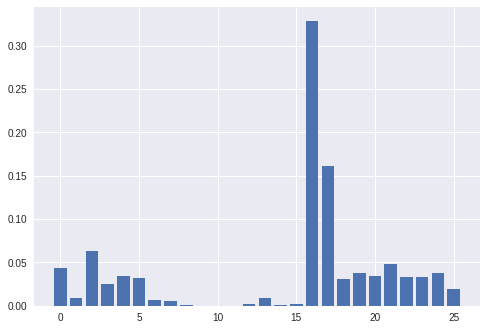

In [ ]:
plt.bar(range(len(clf.feature_importances_)),clf.feature_importances_)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=5000)
xgb.fit(x_train,y_train)
y_predicted = xgb.predict(x_test)
y_train_pred = xgb.predict(x_train)

pred_prob = xgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 75.51
Accuracy Train 100.00
ROC-AUC Score 85.84
Recall Score 95.52


In [ ]:
cv_rf = cross_validate(xgb,X,Y,scoring=('accuracy','roc_auc','recall','precision'),cv = 10)
print("Average CV Accuracy Test \t",(cv_rf['test_accuracy'].mean()*100))
print("Average CV ROC-AUC Score \t",(cv_rf['test_roc_auc'].mean()*100))
print("Average CV Recall Score \t",(cv_rf['test_recall'].mean()*100))
print("Average CV Precision Score \t",(cv_rf['test_precision'].mean()*100))
print("------------------------------")
print("Best Accuracy CV : \t\t", max(cv_rf['test_accuracy']*100))
print("Best ROC CV : \t\t\t", max(cv_rf['test_roc_auc']*100))
print("Best Recall CV : \t\t", max(cv_rf['test_recall']*100))
print("Best Precision CV : \t\t", max(cv_rf['test_precision']*100))

Average CV Accuracy Test 	 81.70918367346938
Average CV ROC-AUC Score 	 84.68317599896548
Average CV Recall Score 	 91.67852062588905
Average CV Precision Score 	 85.54347743240032
------------------------------
Best Accuracy CV : 		 91.83673469387756
Best ROC CV : 			 91.8918918918919
Best Recall CV : 		 97.2972972972973
Best Precision CV : 		 92.3076923076923


<BarContainer object of 26 artists>

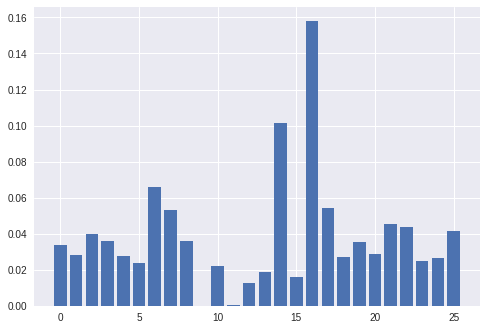

In [ ]:
plt.bar(range(len(xgb.feature_importances_)),xgb.feature_importances_)

In [ ]:
# KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
cross_validation(knn,X,Y)

Average CV Accuracy Test 	 72.90391156462584
Average CV ROC-AUC Score 	 72.5141169878012
Average CV Recall Score 	 86.55049786628733
Average CV Precision Score 	 79.7958229293709
-----------------------------
Best Accuracy CV : 		 79.59183673469387
Best ROC CV : 			 82.06388206388206
Best Recall CV : 		 97.36842105263158
Best Precision CV : 		 86.11111111111111


In [ ]:
estimators = [100,200,500,750,1000,1200,1500,2000,2500,3000,4000,5000]
accuracy = []
roc = []
precision = []
recall = []

for n in estimators:
    clf = RandomForestClassifier(n_estimators=n,min_samples_leaf= 7,n_jobs=-1)
    cv_rf = cross_validate(clf,X,Y,scoring=('accuracy','roc_auc','recall','precision'),cv = 5)
    accuracy.append(cv_rf['test_accuracy'].mean()*100)
    roc.append(cv_rf['test_roc_auc'].mean()*100)
    recall.append(cv_rf['test_recall'].mean()*100)
    precision.append(cv_rf['test_precision'].mean()*100)

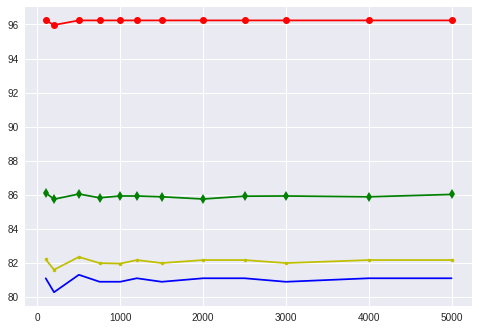

In [ ]:
plt.plot(estimators,accuracy,c='b',marker='x')
plt.plot(estimators,recall,c='r',marker='o')
plt.plot(estimators,roc,c='g',marker='d')
plt.plot(estimators,precision,c='y',marker='.')

Stacking all the classifiers until now

In [ ]:
from sklearn.ensemble import StackingClassifier

classifiers = [ ('rf',RandomForestClassifier(n_estimators=500,min_samples_leaf=7,n_jobs=-1)),
                ('knn',KNeighborsClassifier(n_neighbors=9)),
                ('xgb',XGBClassifier(n_estimators=1000)),
                ('xgbrf',XGBRFClassifier(n_estimators=500,num_parallel_tree=500,num_boost_round=10))
                ]
final_estimator = RandomForestClassifier(n_estimators=500,min_samples_leaf=7,n_jobs=-1)
stack_clf = StackingClassifier(estimators=classifiers,final_estimator = final_estimator, n_jobs=-1)

cross_validation(stack_clf,X,Y)

Average CV Accuracy Test 	79.50
Average CV ROC-AUC Score 	85.43
Average CV Recall Score 	77.55
Average CV Precision Score 	83.37
-----------------------------
Best Accuracy CV : 		87.50
Best ROC CV : 			91.08
Best Recall CV : 		92.31
Best Precision CV : 		91.30


Best Final Estimator : RandomForest

For StackingClassifier

```
Average CV Accuracy Test 	  80.27
Average CV ROC-AUC Score 	  81.67
Average CV Recall Score 	   90.32
Average CV Precision Score 	85.01
------------------------------
Best Accuracy CV  		     89.79
Best ROC CV 		           88.82
Best Recall CV  		       97.36
Best Precision CV    		  90.00
```



Train a classifier on HFrEF and HFpEF. Then predict the HFmrEF and train a final classifier.
Even through HFmrEF is a different class we can predict that which one of the main class they are inclining towards. 
The prognosis depends on the two main classes.

Hence, finally we train the calssifier for the two classess which is capable of handling the HFmrEF cases.

In [ ]:
dfef2['LVEF'].clip(40,50,inplace = True)
dfef2['LVEF'].replace(to_replace=40,value=int(0),inplace=True)
dfef2['LVEF'].replace(to_replace=50,value=int(1),inplace=True)
# index of points with LVEF 41-49
mref_index = dfef2.loc[dfef2['LVEF'] >1].index
#selecting the rows having EF other than 0 or 1
HFmrEF_data = dfef2.loc[dfef2.LVEF >1]
dfef2 = dfef2.drop(index=mref_index)  
Y_pr = dfef2['LVEF'].to_numpy().astype(int)
X_pr = pd.DataFrame(dfef2.drop(columns = ['LVEF'])).to_numpy()

In [ ]:
cross_validation(RandomForestClassifier(n_estimators=5000),X_pr,Y_pr)

Average CV Accuracy Test 	84.38
Average CV ROC-AUC Score 	93.22
Average CV Recall Score 	92.04
Average CV Precision Score 	86.77
-----------------------------
Best Accuracy CV : 		92.11
Best ROC CV : 			97.20
Best Recall CV : 		96.15
Best Precision CV : 		96.00


In [ ]:
Y_mr = HFmrEF_data.LVEF.to_numpy().astype(int)
X_mr = pd.DataFrame(HFmrEF_data.drop(columns=['LVEF'])).to_numpy()

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=5000)
rf_clf.fit(X,Y)
y_hfmref = rf_clf.predict(X_mr)

We have predicted the calsses of HFmrEF : 
as HFrEF and HFpEF

The values were classified based on the model trained on instances of EF < 40 and EF > 50

Storing the in the dataframe.

In [ ]:
mref_index

Int64Index([ 11,  12,  13,  15,  22,  26,  28,  29,  36,  43,
            ...
            448, 453, 454, 465, 471, 472, 474, 482, 483, 486],
           dtype='int64', length=109)

In [ ]:
df_og.loc[mref_index[0],'LVEF']

49.0

In [ ]:
df_mr = df.copy()
df_og_mr = df_og.copy()
df_og_mr['LVEF'].clip(40,50,inplace = True)
df_og_mr['LVEF'].replace(to_replace=40,value=int(0),inplace=True)
df_og_mr['LVEF'].replace(to_replace=50,value=int(1),inplace=True)

df_mr['LVEF'].clip(40,50,inplace = True)
df_mr['LVEF'].replace(to_replace=40,value=int(0),inplace=True)
df_mr['LVEF'].replace(to_replace=50,value=int(1),inplace=True)

for index,label in zip(mref_index,y_hfmref):
    df_mr.loc[index,'LVEF'] =  label
    df_og_mr.loc[index,'LVEF'] =  label

In [ ]:
df_og_mr.to_csv("HFmrEF_classified_LVEF_Labels.csv")

In [ ]:
df_mr = pd.read_csv("/content/HFmrEF_classified_LVEF_Labels.csv")
df_mr.drop(columns=['Unnamed: 0','map','diabetes'],inplace=True)

In [ ]:
Y_mr = df_mr.LVEF.to_numpy().astype(int)
X_mr = pd.DataFrame(df_mr.drop(columns=['LVEF'])).to_numpy()
X_mr = scaling_X(X_mr)

Running models on HFmrEF to 2 class converted data.

In [ ]:
rfmr = RandomForestClassifier(n_estimators= 500,min_samples_leaf=15)
rfmr.fit(X,Y)
cross_validation(rfmr,X,Y)

Average CV Accuracy Test 	79.26
Average CV ROC-AUC Score 	85.48
Average CV Recall Score 	97.84
Average CV Precision Score 	79.67
-----------------------------
Best Accuracy CV : 		83.67
Best ROC CV : 			92.34
Best Recall CV : 		100.00
Best Precision CV : 		82.22


Random Forest

LVEF cutoff : 40


```
Average CV Accuracy Test 	80.08
Average CV ROC-AUC Score 	85.88
Average CV Recall Score 	 97.84
Average CV Precision Score   80.35
-----------------------------
Best Accuracy CV : 		  83.67
Best ROC CV : 			   92.14
Best Recall CV : 		    100.0
Best Precision CV : 		 82.61
```
HFmrEF distributed classified into 2 classes



```
Average CV Accuracy Test 	83.15
Average CV ROC-AUC Score 	93.85
Average CV Recall Score 	 95.30
Average CV Precision Score   82.22
```




In [ ]:
from sklearn.ensemble import StackingClassifier
classifiers = [ ('rf',RandomForestClassifier(n_estimators=500,min_samples_leaf=13,n_jobs=-1)),
                ('knn',KNeighborsClassifier(n_neighbors=9)),
                ('xgb',XGBClassifier(n_estimators=1000)),
                ('xgbrf',XGBRFClassifier(n_estimators=500,num_parallel_tree=500,num_boost_round=10))
                ]
final_estimator = RandomForestClassifier(n_estimators=500,min_samples_leaf=7,n_jobs=-1)
stack_clf = StackingClassifier(estimators=classifiers,final_estimator = final_estimator, n_jobs=-1)

cross_validation(stack_clf,X,Y)

Average CV Accuracy Test 	80.68
Average CV ROC-AUC Score 	84.52
Average CV Recall Score 	91.96
Average CV Precision Score 	84.45
-----------------------------
Best Accuracy CV : 		87.50
Best ROC CV : 			90.91
Best Recall CV : 		100.00
Best Precision CV : 		91.67


Stacking Classifier:

When HFmrEF is classified into 2 classes and model is trained on resultant data.

```
Average CV Accuracy Test 	 88.095
Average CV ROC-AUC Score 	 94.013
Average CV Recall Score 	 90.282
Average CV Precision Score 	 91.712
-----------------------------
Best Accuracy CV : 		 93.877
Best ROC CV : 			 98.292
Best Recall CV : 		 96.875
Best Precision CV : 		 100.0
```

Otherwise with 40 cutoff : 


```
Average CV Accuracy Test 	 80.684
Average CV ROC-AUC Score 	 85.317
Average CV Recall Score 	 97.034
Average CV Precision Score 	 81.336
-----------------------------
Best Accuracy CV : 		 85.71
Best ROC CV : 			 92.34
Best Recall CV : 		 100.0
Best Precision CV : 		 84.44
```




In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(learning_rate=0.5,num_iterations = 5000)
cross_validation(lgb,X,Y)

Average CV Accuracy Test 	 81.09268707482993
Average CV ROC-AUC Score 	 85.42264752791068
Average CV Recall Score 	 90.86059743954482
Average CV Precision Score 	 85.52977724030356
-----------------------------
Best Accuracy CV : 		 85.71428571428571
Best ROC CV : 			 92.7927927927928
Best Recall CV : 		 97.36842105263158
Best Precision CV : 		 91.66666666666666


In [ ]:
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier
classifiers = [ ('rf',RandomForestClassifier(n_estimators=500,min_samples_leaf=7,n_jobs=-1)),
                ('knn',KNeighborsClassifier(n_neighbors=9)),
                ('xgb',XGBClassifier(n_estimators=1000)),
                ('xgbrf',XGBRFClassifier(n_estimators=500,num_parallel_tree=500,num_boost_round=10)),
                ('lgb',LGBMClassifier(learning_rate=0.5,num_iterations = 1500))
                ]
voting_clf = VotingClassifier(estimators=classifiers,voting='soft', n_jobs=-1)
cross_validation(voting_clf,X_mr,Y_mr)

Average CV Accuracy Test 	87.88
Average CV ROC-AUC Score 	94.66
Average CV Recall Score 	91.54
Average CV Precision Score 	90.24
-----------------------------
Best Accuracy CV : 		93.88
Best ROC CV : 			98.35
Best Recall CV : 		96.88
Best Precision CV : 		100.00


Voting Classifer : Hard

LVEF cutoff : 40


```
Average CV Accuracy Test 	 81.30
Average CV Recall Score 	  95.68
Average CV Precision Score    82.61
-----------------------------
Best Accuracy CV : 		   87.75
Best Recall CV : 		     100.0
Best Precision CV : 		  86.05

```

HFmrEF classfied into 2 classes

Voting : Soft 

```
Average CV Accuracy Test 	 88.29
Average CV Recall Score 	  91.85
Average CV Precision Score    90.60
-----------------------------
Best Accuracy CV : 		   93.87
Best Recall CV : 		     96.87
Best Precision CV : 		  100.0
```
Voting : Soft


```
Average CV Accuracy Test 	87.88
Average CV ROC-AUC Score 	94.66
Average CV Recall Score 	 91.54
Average CV Precision Score   90.24
-----------------------------
Best Accuracy CV : 		  93.88
Best ROC CV : 			   98.35
Best Recall CV : 		    96.88
Best Precision CV : 		 100.0
```





In [ ]:
df_mr.columns
features = [0,2,3,14,15,18,19]


Index(['pulse', 'respiration', 'systolic.blood.pressure',
       'diastolic.blood.pressure', 'BMI',
       'NYHA.cardiac.function.classification', 'Killip.grade',
       'myocardial.infarction', 'peripheral.vascular.disease',
       'cerebrovascular.disease', 'Chronic.obstructive.pulmonary.disease',
       'CCI.score', 'type.II.respiratory.failure', 'fio2', 'LVEF',
       'left.ventricular.end.diastolic.diameter.LV',
       'brain.natriuretic.peptide', 'cystatin', 'creatine.kinase',
       'cholesterol', 'creatinine.enzymatic.method', 'sodium', 'potassium',
       'calcium', 'high.sensitivity.troponin'],
      dtype='object')

Text(0.5, 1.0, 'Feature importances for RF on HFmrEF classified')

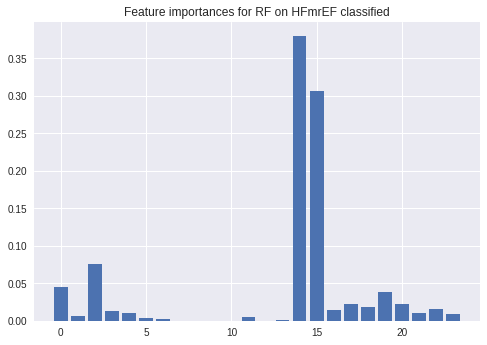

In [ ]:
plt.bar(range(len(rfmr.feature_importances_)),rfmr.feature_importances_)
plt.title("Feature importances for RF on HFmrEF classified")

Text(0.5, 1.0, 'Feature importances for RF on cutoff of 40')

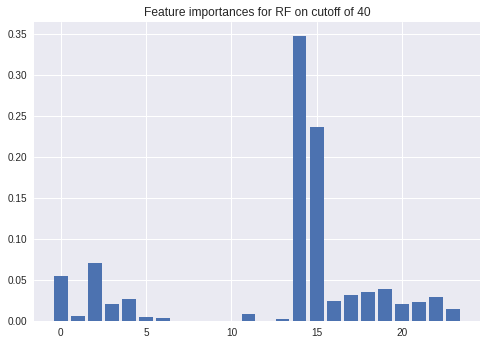

In [ ]:
plt.bar(range(len(rfmr.feature_importances_)),rfmr.feature_importances_)
plt.title("Feature importances for RF on cutoff of 40")

Taking only :
features = [0,2,3,4,14,15,18,19]

* 0 : Pulse
* 2 : SBP
* 3 : DBP
* 4 : BMI
* 14: LV end diastolic Diameter
* 15: BNP
* 18: Cholesterol
* 19: Creaatinine Enzymatic Method

In [ ]:
df_reduced = dfef1.loc[:,['pulse','systolic.blood.pressure','diastolic.blood.pressure','BMI','LVEF','left.ventricular.end.diastolic.diameter.LV',
                        'brain.natriuretic.peptide','cholesterol', 'creatinine.enzymatic.method']]
df_mr_reduced = df_mr.loc[:,['pulse','systolic.blood.pressure','diastolic.blood.pressure','BMI','LVEF','left.ventricular.end.diastolic.diameter.LV',
                        'brain.natriuretic.peptide','cholesterol', 'creatinine.enzymatic.method']]

In [ ]:
Y_r = df_reduced.LVEF.to_numpy().astype(int)
X_r = pd.DataFrame(df_reduced.drop(columns=['LVEF'])).to_numpy()
X_r = scaling_X(X_r)

Y_mr_r = df_mr_reduced.LVEF.to_numpy().astype(int)
X_mr_r = pd.DataFrame(df_mr_reduced.drop(columns=['LVEF'])).to_numpy()
X_mr_r = scaling_X(X_mr_r)

In [ ]:
rfr = RandomForestClassifier(n_estimators=500,min_samples_leaf=13)
rfr.fit(X_mr_r,Y_mr_r)
cross_validation(rfr,X_mr_r,Y_mr_r)

Average CV Accuracy Test 	88.10
Average CV ROC-AUC Score 	94.68
Average CV Recall Score 	91.85
Average CV Precision Score 	90.43
-----------------------------
Best Accuracy CV : 		95.92
Best ROC CV : 			98.53
Best Recall CV : 		96.88
Best Precision CV : 		100.00


RF accuracy on reduced features
cutoff 40

```
Average CV Accuracy Test 	80.28
Average CV ROC-AUC Score 	86.66
Average CV Recall Score 	 95.16
Average CV Precision Score   81.95
```

on HFmrRF classified to other classes



```
Average CV Accuracy Test 	88.31
Average CV ROC-AUC Score 	94.73
Average CV Recall Score 	 92.18
Average CV Precision Score   90.47
```





Text(0.5, 1.0, 'Feature Importance for RFClassifier (HFmrEF classified)')

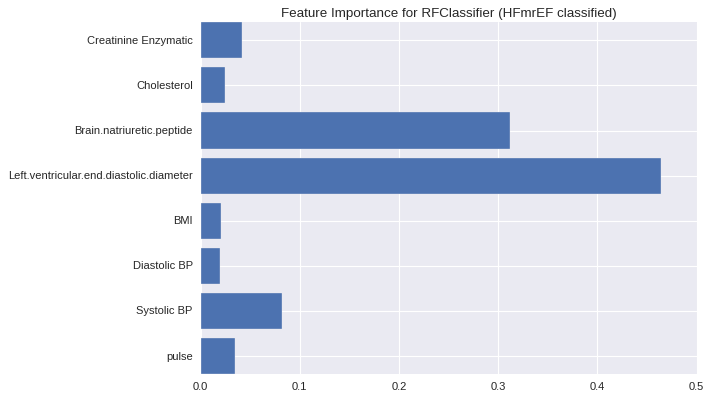

In [ ]:
plt.style.use("seaborn")
x_label = ['pulse','Systolic BP','Diastolic BP','BMI','Left.ventricular.end.diastolic.diameter','Brain.natriuretic.peptide','Cholesterol','Creatinine Enzymatic']
plt.barh(x_label,rfr.feature_importances_)
plt.title("Feature Importance for RFClassifier (HFmrEF classified)")

In [ ]:
x_label = ['pulse','Systolic BP','Diastolic BP','BMI','Left.ventricular.end.diastolic.diameter','brain.natriuretic.peptide','Cholesterol','Brain Natriuretic Peptide']
plt.barh(x_label,rfr.feature_importances_)
plt.title("Feature Importance for RFClassifier")

In [ ]:
plt.style.use('classic')

In [ ]:
num = {0:'pulse',1:'systolic.blood.pressure',3:'BMI',4:'left.ventricular.end.diastolic.diameter.LV',
                        5:'brain.natriuretic.peptide',6:'cholesterol',7: 'creatinine.enzymatic.method'}
number = [0,1,3,4,5,6,7]
def plot_decision_boundaries(X, y,name, model_class, **model_params):
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    for n in range(0,len(number)):
        # print(x)
        for nn in range(n+1,len(number)):
            # XX = X[:,[n,nn]].copy()
            reduced_data = X[:, [number[n],number[nn]]]
            # Instantiate the model object
            model = model_class(**model_params)
            # Fits the model with the reduced data
            model.fit(reduced_data, y)

            # Step size of the mesh. Decrease to increase the quality of the VQ.
            h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

            # Plot the decision boundary. For that, we will assign a color to each
            x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
            y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
            # Meshgrid creation
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

            # Obtain labels for each point in mesh using the model.
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

            x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
            y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                np.arange(y_min, y_max, 0.1))

            # Predictions to obtain the classification results
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

            # Plotting
            plt.figure(figsize=(12,7))
            plt.contourf(xx, yy, Z, alpha=0.25)
            plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y, alpha=0.8)
            plt.xlabel("Feature-1",fontsize=5)
            plt.ylabel("Feature-2",fontsize=5)
            plt.xticks(fontsize=8)
            plt.yticks(fontsize=8)
            plt.title(f'{model_class}-{num[number[n]]} vs {num[number[nn]]}')
            #plt.savefig(f'four_features/{num[number[n]]} vs {num[number[nn]]}___{name}__FOUR.png')
            # return plt

In [ ]:
plot_decision_boundaries(X_mr_r,Y_mr_r,'RandomForestClassifier',RandomForestClassifier,n_estimators=500,min_samples_leaf=13)

In [ ]:
plot_decision_boundaries(X_r,Y_r,'RandomForestClassifier',RandomForestClassifier,n_estimators=500,min_samples_leaf=13)

###Extract the data of reduced features as samples might increase.

Now train again for HFmrEF and cutoff with LVEF 40

In [ ]:
i = -1
for each in df.columns:
    i+=1
    if each == 'LVEF':
        i-=1
        continue
    print(i,each)

In [ ]:
xgb = XGBClassifier(n_estimators = 1000,n_jobs=-1,).fit(X,Y)
rf = RandomForestClassifier(n_estimators = 500,n_jobs=-1).fit(X,Y)
lgb = LGBMClassifier().fit(X,Y)
cat = CatBoostClassifier(iterations=1000,silent=True).fit(X,Y)

In [ ]:
plt.bar(range(len(xgb.feature_importances_)),xgb.feature_importances_)
plt.title("Feature importances for RF on cutoff of 40")
#cross_validation(cat,X,Y)

Training the model on pure HFrEF and HFpEF to predict label for HFmrEF

In [120]:
df_red = pd.read_csv("/content/HF_Classification_Reduced_Features.csv")

#clipping the outliers
df_red.drop(columns=['Unnamed: 0','Killip.grade'],inplace=True)
df_red['brain.natriuretic.peptide'].clip(upper=3000,inplace=True)
df_red['creatinine.enzymatic.method'].clip(upper=600,inplace=True)
df_red['creatine.kinase'].clip(upper=1000,inplace=True)

# Log transformation
for each in df_red.columns:
    if max(df_red[each]) > 10 and each != 'LVEF':
        df_red[each] = np.log(df_red[each])

In [ ]:
df_red.columns
df_red.shape

(495, 10)

In [121]:
df_red1 = df_red.copy()
df_red1['LVEF'].clip(40,50,inplace = True)
df_red1['LVEF'].replace(to_replace=40,value=int(0),inplace=True)
df_red1['LVEF'].replace(to_replace=50,value=int(1),inplace=True)
# index of points with LVEF 41-49
mref_index = df_red1.loc[df_red1['LVEF'] >1].index
#selecting the rows having EF other than 0 or 1
HFmrEF_data = df_red1.loc[df_red1.LVEF >1]
df_red1 = df_red1.drop(index=mref_index)  
Y_pr = df_red1['LVEF'].to_numpy().astype(int)
X_pr = pd.DataFrame(df_red1.drop(columns = ['LVEF'])).to_numpy()

In [50]:
len(X_pr)

384

In [122]:
# Augmenting the synthetic samples to tackle class imbalance
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_pr_aug, Y_pr_aug = ada.fit_resample(X_pr,Y_pr)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [123]:
lgb = LGBMClassifier(n_estimators=1000)
lgb.fit(X_pr_aug,Y_pr_aug)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [65]:
#X_pr_aug = scaling_X(X_pr_aug,X_pr_aug)

In [124]:
cross_validation(lgb,X_pr_aug,Y_pr_aug)

Average CV Accuracy Test 	91.02
Average CV ROC-AUC Score 	95.24
Average CV Recall Score 	86.87
Average CV Precision Score 	94.64
-----------------------------
Best Accuracy CV : 		94.44
Best ROC CV : 			98.49
Best Recall CV : 		96.30
Best Precision CV : 		100.00


In [125]:
rfmr = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
rfmr.fit(X_pr_aug,Y_pr_aug)
cross_validation(rfmr,X_pr_aug,Y_pr_aug)

Average CV Accuracy Test 	89.74
Average CV ROC-AUC Score 	95.46
Average CV Recall Score 	84.27
Average CV Precision Score 	94.32
-----------------------------
Best Accuracy CV : 		96.30
Best ROC CV : 			99.86
Best Recall CV : 		96.30
Best Precision CV : 		100.00


In [ ]:
# Depricated. Replaced with augmented trained set from ADASYN
rfmr = RandomForestClassifier(n_estimators=500,n_jobs=-1)
rfmr.fit(X_pr,Y_pr)
cross_validation(rfmr,X_pr,Y_pr)

In [ ]:
plt.bar(range(len(rfmr.feature_importances_)),rfmr.feature_importances_)
plt.title("Feature importances for RF on cutoff of 40")

In [128]:
Y_mr = HFmrEF_data.LVEF.to_numpy().astype(int)
X_mr = pd.DataFrame(HFmrEF_data.drop(columns=['LVEF'])).to_numpy()

In [68]:
X_mr = scaling_X(X_pr_aug,X_mr)

In [134]:
y_hfmref_rf = rfmr.predict(X_mr)
y_hfmref_lgb = lgb.predict(X_mr)

In [109]:
# df_mr = df_red.copy()
# df_mr['LVEF'].clip(40,50,inplace = True)
# df_mr['LVEF'].replace(to_replace=40,value=int(0),inplace=True)
# df_mr['LVEF'].replace(to_replace=50,value=int(1),inplace=True)
# #y_hfmref : Predicted labels from HFrEF and HFpEF classifier
# for index,label in zip(mref_index,y_hfmref_rf):
#     df_mr.loc[index,'LVEF'] = label


In [137]:
# Dataset with HFmrEF clasified into p and r
# Y_mrp = df_mr.LVEF.to_numpy().astype(int)
# X_mrp = pd.DataFrame(df_mr.drop(columns=['LVEF'])).to_numpy()
# X_mrp = scaling_X(X_mrp,X_mrp)

X_mrp = np.concatenate((X_pr_aug,X_mr))
Y_mrp_lgb = np.concatenate((Y_pr_aug,y_hfmref_lgb))
Y_mrp_rf = np.concatenate((Y_pr_aug,y_hfmref_rf))
X_mrp = scaling_X(X_mrp,X_mrp)

In [132]:
Y_mrp.shape

(655,)

RF and LGBM Model with HFmrEF labelled as P and R based on selected 9 features.

Models Trained on HFmrEF labels obtained from LBGM model



In [142]:
# Final set = Aug_set +labelled
cross_validation(RandomForestClassifier(n_estimators=500,n_jobs=-1)
                ,X_mrp,Y_mrp_lgb)

Average CV Accuracy Test 	89.93
Average CV ROC-AUC Score 	95.52
Average CV Recall Score 	83.67
Average CV Precision Score 	94.70
-----------------------------
Best Accuracy CV : 		96.92
Best ROC CV : 			98.67
Best Recall CV : 		93.55
Best Precision CV : 		100.00


In [143]:
# Final set = Aug_set +labelled
cross_validation(LGBMClassifier(n_estimators=1000),X_mrp,Y_mrp_lgb)

Average CV Accuracy Test 	92.54
Average CV ROC-AUC Score 	96.14
Average CV Recall Score 	87.51
Average CV Precision Score 	96.59
-----------------------------
Best Accuracy CV : 		98.46
Best ROC CV : 			99.53
Best Recall CV : 		96.77
Best Precision CV : 		100.00


In [101]:
cross_validation(RandomForestClassifier(n_estimators=500,n_jobs=-1)
                ,X_mrp,Y_mrp)

Average CV Accuracy Test 	87.69
Average CV ROC-AUC Score 	94.14
Average CV Recall Score 	90.12
Average CV Precision Score 	90.53
-----------------------------
Best Accuracy CV : 		92.00
Best ROC CV : 			97.85
Best Recall CV : 		96.77
Best Precision CV : 		96.67


In [102]:
cross_validation(LGBMClassifier(n_estimators=1000),X_mrp,Y_mrp)

Average CV Accuracy Test 	86.27
Average CV ROC-AUC Score 	94.20
Average CV Recall Score 	89.48
Average CV Precision Score 	89.14
-----------------------------
Best Accuracy CV : 		92.00
Best ROC CV : 			97.49
Best Recall CV : 		96.77
Best Precision CV : 		96.67


Models Trained on HFmrEF labels obtained from RF model

In [141]:
# Final set = Aug_set +labelled
cross_validation(RandomForestClassifier(n_estimators=100,n_jobs=-1)
                ,X_mrp,Y_mrp_rf)

Average CV Accuracy Test 	91.32
Average CV ROC-AUC Score 	95.71
Average CV Recall Score 	86.09
Average CV Precision Score 	95.28
-----------------------------
Best Accuracy CV : 		98.46
Best ROC CV : 			99.81
Best Recall CV : 		96.77
Best Precision CV : 		100.00


In [111]:
cross_validation(RandomForestClassifier(n_estimators=100,n_jobs=-1)
                ,X_mrp,Y_mrp)

Average CV Accuracy Test 	88.31
Average CV ROC-AUC Score 	93.94
Average CV Recall Score 	89.31
Average CV Precision Score 	91.82
-----------------------------
Best Accuracy CV : 		95.92
Best ROC CV : 			97.40
Best Recall CV : 		96.77
Best Precision CV : 		96.77


In [113]:
cross_validation(LGBMClassifier(n_estimators=100),X_mrp,Y_mrp)

Average CV Accuracy Test 	86.10
Average CV ROC-AUC Score 	93.27
Average CV Recall Score 	88.35
Average CV Precision Score 	89.54
-----------------------------
Best Accuracy CV : 		93.88
Best ROC CV : 			96.77
Best Recall CV : 		96.77
Best Precision CV : 		100.00


##Adding 3 Medicinal features : Diuretics, Vasodilators and Inotropes

In [ ]:
df = pd.read_csv("/content/HF_Classification_reduced_with_Medicinal_features.csv")
df.drop(columns= ["Unnamed: 0",'Killip.grade'],inplace = True)

In [ ]:
dfef = df.copy()
for each in dfef.columns:
    if max(dfef[each]) > 10 and each != 'LVEF':
        dfef[each].clip(lower=0.0000001,inplace = True)
        dfef[each] = np.log(dfef[each])
dfef['LVEF'].clip(40,41,inplace = True)
dfef['LVEF'].replace(to_replace=40,value=int(0),inplace=True)
dfef['LVEF'].replace(to_replace=41,value=int(1),inplace=True)
Y_med = dfef['LVEF'].to_numpy().astype(int)
X_med = pd.DataFrame(dfef.drop(columns = ['LVEF'])).to_numpy()
X_med = scaling_X(X_med)

In [ ]:
rf = RandomForestClassifier(n_estimators=1000,n_jobs=-1)
rf.fit(X_med,Y_med)
#cross_validation(rf,X_med,Y_med)

Text(0.5, 1.0, 'Feature importances for RF on cutoff of 40')

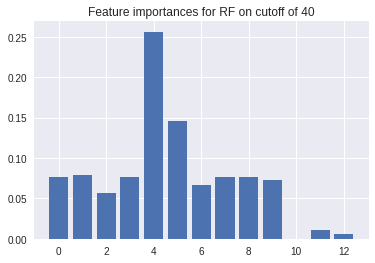

In [ ]:
plt.bar(range(len(rf.feature_importances_)),rf.feature_importances_)
plt.title("Feature importances for RF on cutoff of 40")

In [ ]:
df_red1 = df.copy()
for each in df_red1.columns:
    if max(df_red1[each]) > 10 and each != 'LVEF':
        df_red1[each].clip(lower=0.0000001,inplace = True)
        df_red1[each] = np.log(df_red1[each])
df_red1['LVEF'].clip(40,50,inplace = True)
df_red1['LVEF'].replace(to_replace=40,value=int(0),inplace=True)
df_red1['LVEF'].replace(to_replace=50,value=int(1),inplace=True)
# index of points with LVEF 41-49
mref_index = df_red1.loc[df_red1['LVEF'] >1].index
#selecting the rows having EF other than 0 or 1
HFmrEF_data = df_red1.loc[df_red1.LVEF >1]
df_red1 = df_red1.drop(index=mref_index)  
Y_pr = df_red1['LVEF'].to_numpy().astype(int)
X_pr = pd.DataFrame(df_red1.drop(columns = ['LVEF'])).to_numpy()

In [ ]:
cat = CatBoostClassifier(iterations = 50000,border_count = 254).fit(X_pr,Y_pr)
#cross_validation(cat,X_pr,Y_pr)